# Different values of Pi

The constant $\pi = 3.1415... $ and there isn't much we can do about that. However, if we consider $$pi = \frac{C}{d}$$ where $C$ is the circumference of a circle and $d$ its diameter, then things can get more interesting.

## Step 1: A "normal" circle

The circumference are all the points that lie on the edge of a circle. If we consider the unit circle in our normal euclidean space we can calculate it as $$(x,y) \text{ is on the circle if } \sqrt{x^2 + y^2} \le 1$$
We can render this something like this:

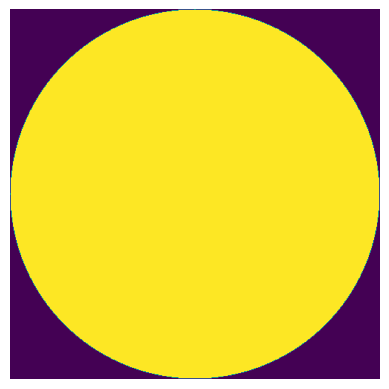

In [35]:
from matplotlib import pyplot as plt
from math import sqrt

resolution = 250
circle = np.zeros((resolution*2+1, resolution*2+1))
res_squared = resolution * resolution

for x in range(-resolution, resolution):
    for y in range(-resolution, resolution):
        norm_x = x / resolution
        norm_y = y / resolution
        if sqrt(norm_x*norm_x + norm_y*norm_y) <= 1:
            circle[x+resolution][y+resolution] = 1

fig = plt.imshow(circle)
axis = plt.axis('off')

# Manhattan

In the Manhattan or [Taxi Cab metric](https://en.wikipedia.org/wiki/Taxicab_geometry) you can only move along the $x$ or $y$ coordiante. Before we look at the circle in the taxi cab metric we need to generalize our definition of a circle a bit:

$$(x,y) \text{ is on the circle if } d(x, y) \le 1$$

where $d(x,y)$ is a distance metric. If we place in the Taxi Cab metric we arrive at:

$$(x,y) \text{ is on the circle if } \lvert x \lvert + \lvert y \lvert \le 1$$

Which leads to a circle that looks like this:

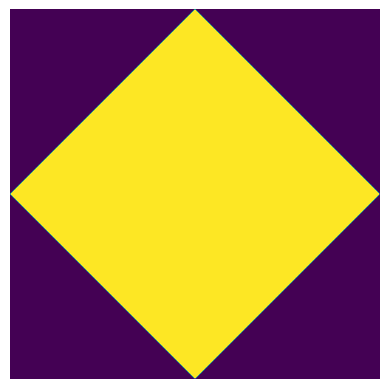

In [23]:
from matplotlib import pyplot as plt
from math import sqrt

resolution = 250
circle = np.zeros((resolution*2+1, resolution*2+1))
res_squared = resolution * resolution

for x in range(-resolution, resolution):
    for y in range(-resolution, resolution):
        norm_x = x / resolution
        norm_y = y / resolution
        if abs(norm_x)+ abs(norm_y) <= 1:
            circle[x+resolution][y+resolution] = 1

fig = plt.imshow(circle)
axis = plt.axis('off')

At first glance one might think the circumference of the circle here is $4 * \sqrt{2}$ which would be the sum of diagonals but in a taxi cab world we can only go along $x$ or $y$ coordinates which means we'll actually have to move a distance of $2$ for each diagonal step:

![Distance](https://uploads-cdn.omnicalculator.com/images/manhattan_distance.png?width=425&enlarge=0&format=webp)

Which means the circumference of the unit circle is $4 * 2$ which in turn means 

$$\pi = 8 / 2 = 4$$



# $L^{P}$-Norms

$L^{P}$-Norms are distance metrics. We calculate them for a vector $x$ as follows:

$$L^{P} = \left(\sum_{n}{\lvert x_{n} \lvert^{p}}\right)^{1/p}$$

Euclidean distances is $L^{2}$ and Manhattan distance is $L^{1}$.

This means we can render the unit circles under the $L^{P}$-Norms for higher values of $P$ as well.

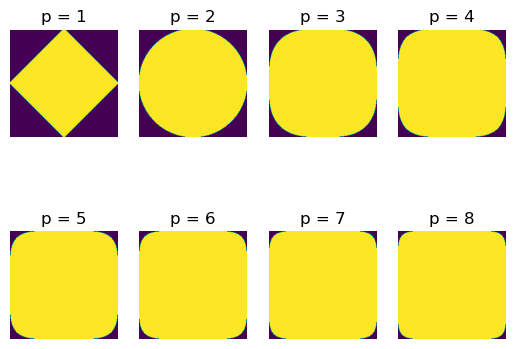

In [22]:
from matplotlib import pyplot as plt
import scipy.spatial.distance as distance
import numpy as np

def render_lp_circle(p, resolution=250):
    circle = []
    for x in range(0, resolution, 1):
        row = []
        for y in range(0, resolution, 1):
            X = np.array([[0,0], [x/resolution,y/resolution]])
            row.append(distance.pdist(X, 'minkowski', p=p)[0] <= 1)
        circle.append(row)
    # We just render a quarter of the circle and flip it twice to make it a bit faster
    circle = np.concatenate((np.flip(circle, axis=1), circle), axis=1) 
    circle = np.concatenate((np.flip(circle, axis=0), circle), axis=0)
    return circle

fig, axs = plt.subplots(2, 4)
for row in range(2):
    for col in range(4):
        p = row*4+col+1
        axs[row][col].imshow(render_lp_circle(p, 100))
        axs[row][col].axis('off')
        axs[row][col].set_title(f'p = {p}')


As it turns out $P$ does not have to be an integer and you can calculate $pi$ for all these circles on a continuuum [^1] resulting in something like this [^2]:

![LPPi](https://blogs.sas.com/content/iml/files/2019/03/LpCircles2.png)

[^1]: https://www.jstor.org/stable/2687579
[^2]: https://blogs.sas.com/content/iml/2019/03/13/pi-in-lp-metric.html

# Down to earth

If you were to stand outside in a parking lot and draw a cricle around yourself with radius $1$m, how large would the circumference be? If you say $2 * \pi$ you might be a flat-earther. To illustrate the point, let's say I had asked you to stand at the north-pole and draw a circle with radius $10.000$km. Assuming the earth is a perfect ball, you'd be drawing a line along the equator, which is $40.000$km. So, coming back to our formula $pi = \frac{C}{d}$ we see that

$$pi = \frac{40.0000}{10.000 * 2} = 2$$

And if you were to draw a circle with radius $20.000$ while standing on the north-pole you'd be drawing a single dot on the south-pole arriving at $pi = 0$

![Sphere](sphere.png)

We can calcualte the different values of $pi$ based on the radius of the circle with respect to the radius of the globe. Let's take a look at the cross-section:

![Circle](circle.png)


where $r$ is the radius of the circle we draw on the ball. $c$ is the distance to the center. For simplicity we assume a unit ball which means $c = 1$. The length of the circle we draw is a circle of radiu $x$ which means the circumference is $2 * \pi * x$. We get $x$ from $r$ by calculating the angle in the center as

$$
\alpha = \frac{r}{\pi} * \pi =  r
$$

since it's a unit ball and half of the circumference is just $\pi$. Then we get

$$\sin(\alpha) = x / c = x$$

which gives us

$$x = \sin\left(\frac{r}{\pi}\right)$$

which gives us the circumference as a function of $r$:

$$
C(r) = 2\pi * x = 2\pi * \sin\left(r\right)
$$

which in turn allows us to calculate $pi$ (the relation between cricumference and radius) as a function of $r$

$$pi(r) = \frac{C(r)}{2 r} = \frac{\pi * \sin\left(r\right)}{r}$$

which we can plot

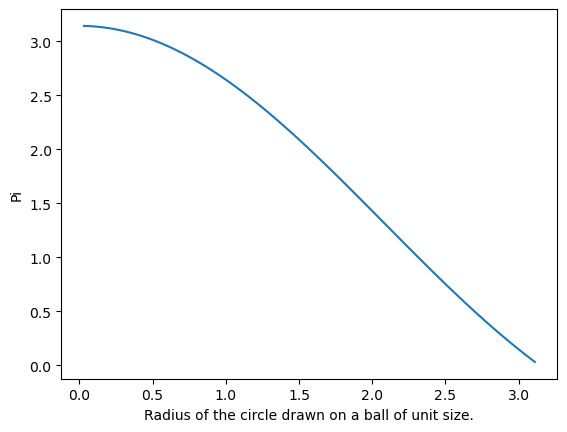

In [67]:
from matplotlib import pyplot as plt
import numpy as np

x = []
y = [np.pi]
y = []
steps = 100
for x_idx in range(1, steps):
    cur_x = x_idx / steps * np.pi
    x.append(cur_x)
    y.append(np.pi * np.sin(cur_x) / cur_x)
    
fig = plt.plot(x,y)
p = plt.xlabel('Radius of the circle drawn on a ball of unit size')
p = plt.ylabel('Pi')

# But what is the circumference of a circle really?

We can state something like: 

$$
\text{The circumference is the sum of the distances between the adjacent points that have the same distance from the center.}
$$

that is pretty straight forward but it makes things interesting because it allows us to leave the realm of continuous space. If we think about a map where we're only allowed to travel along roads, we may be able to reach a set of cities in a 1 hour drive but but the distances between those cities can add up to almost anything depending on their connections. Boiled down to the most basic form, we're talking about calculating the length of a radius on graph.

![Graph](graph.png)

Here, the points 2-5 all have the distance 1 to the center point, so they are all on the circle. The sum of distances between the adjacent points on the circle is 7 resulting in $pi = 3.5$. But we can easily see that here, we can make $pi$ anything we want by adjusting the number of points on the circle and the distances between them.